In [14]:
import networkx as nx
import random as rd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import math
import pandas as pd

In [15]:
### Load data

File_Names= [["a3_b3_g1_e2_1_1", "a3_b3_g1_e2_1_2", "a3_b3_g1_e2_1_3", "a3_b3_g1_e2_1_4"], ["a3_b3_g1.5_e2_1_1", "a3_b3_g1.5_e2_1_2", "a3_b3_g1.5_e2_1_3", "a3_b3_g1.5_e2_1_4"], ["a3_b3_g2.0_e2_1_1", "a3_b3_g2.0_e2_1_2", "a3_b3_g2.0_e2_1_3", "a3_b3_g2.0_e2_1_4"], ["a3_b3_g2.1_e2_1_1", "a3_b3_g2.1_e2_1_2", "a3_b3_g2.1_e2_1_3", "a3_b3_g2.1_e2_1_4"], ["a3_b3_g2.2_e2_1_1", "a3_b3_g2.2_e2_1_2", "a3_b3_g2.2_e2_1_3", "a3_b3_g2.2_e2_1_4"], ["a3_b3_g2.5_e2_1_1", "a3_b3_g2.5_e2_1_2", "a3_b3_g2.5_e2_1_3", "a3_b3_g2.5_e2_1_4"], ["a3_b3_g3_e2_1_1", "a3_b3_g3_e2_1_2", "a3_b3_g3_e2_1_3", "a3_b3_g3_e2_1_4"]]
g = globals()

for i in range(len(File_Names)):
    for j in range(len(File_Names[i])):
        g[f"data{4*i+j+1}"] = np.loadtxt(f'D:\Daten mit Änderungen\Physik\Bachelorarbeit\Generated_Data\{File_Names[i][j]}.csv', delimiter=',')

In [16]:
### Split data into two opinions per dataset

N = 1000


for i in range(28):
    for j in range(2):
        g[f"data_{i+1}_op_{j+1}"] = []
        for k in range (N):
            g[f"data_{i+1}_op_{j+1}"].append( g[f"data{i+1}"][2*k + 1 + j] )

### Determine variances and weigh them over 4 simulations

for i in range(28):
    for j in range(2):
        g[f"var_{i+1}_{j+1}"] = np.var( g[f"data_{i+1}_op_{j+1}"], axis=1)

for i in range(7):
    for j in range(2):
        g[f"var_weigh_{i+1}_{j+1}"] = np.zeros(N)
        for k in range (N):
            g[f"var_weigh_{i+1}_{j+1}"][k] += (g[f"var_{4*i+1}_{j+1}"][k] + g[f"var_{4*i+2}_{j+1}"][k] + g[f"var_{4*i+3}_{j+1}"][k] + g[f"var_{4*i+4}_{j+1}"][k]) / 4

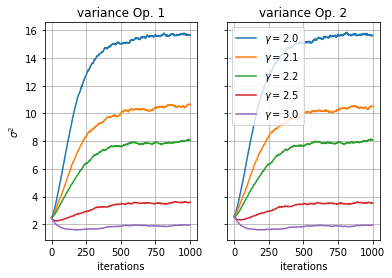

In [17]:
iterations = np.arange(1,N+1)

gamma = [1.0, 1.5, 2.0, 2.1, 2.2, 2.5, 3.0]

fig, ax = plt.subplots(1, 2, sharey=True)

ax[0].set_title("variance Op. 1")
for i in range (5):
    ax[0].plot(iterations, g[f"var_weigh_{i+3}_1"])
ax[0].set_xlabel("iterations")
ax[0].set_ylabel(f"$\sigma^2$")
ax[0].grid()
ax[1].set_title("variance Op. 2")
for i in range (5):
    ax[1].plot(iterations, g[f"var_weigh_{i+3}_2"], label=f"$\gamma = ${gamma[i+2]}")
ax[1].set_xlabel("iterations")
ax[1].grid()
ax[1].legend()
plt.show()